In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

In [4]:
from sklearn import datasets

iris_data = datasets.load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris = pd.DataFrame(
    iris_data.data,
    columns=iris_data.feature_names
    )
iris['target'] = iris_data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
target_names = {
    0:'iris-setosa',
    1:'iris-versicolor',
    2:'iris-virginica'
}

iris['class'] = iris['target'].map(target_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,iris-setosa
1,4.9,3.0,1.4,0.2,0,iris-setosa
2,4.7,3.2,1.3,0.2,0,iris-setosa
3,4.6,3.1,1.5,0.2,0,iris-setosa
4,5.0,3.6,1.4,0.2,0,iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,iris-virginica
146,6.3,2.5,5.0,1.9,2,iris-virginica
147,6.5,3.0,5.2,2.0,2,iris-virginica
148,6.2,3.4,5.4,2.3,2,iris-virginica


In [6]:
iris.drop(["target"], axis=1, inplace=True)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,iris-virginica
146,6.3,2.5,5.0,1.9,iris-virginica
147,6.5,3.0,5.2,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,iris-virginica


In [7]:
classes =  iris['class'].unique().tolist()
classes

['iris-setosa', 'iris-versicolor', 'iris-virginica']

In [8]:
iris.groupby(['class']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
iris-setosa,5.006,3.428,1.462,0.246
iris-versicolor,5.936,2.770,4.260,1.326
iris-virginica,6.588,2.974,5.552,2.026


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# putting feature variable to x
x = iris.drop(['class'], axis=1)
# putting target variable to y
y = iris['class']


In [11]:
x, y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0         iris-setosa
 1

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

In [13]:
x_train, x_test, y_train, y_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 10                 5.4               3.7                1.5               0.2
 25                 5.0               3.0                1.6               0.2
 13                 4.3               3.0                1.1               0.1
 131                7.9               3.8                6.4               2.0
 65                 6.7               3.1                4.4               1.4
 ..                 ...               ...                ...               ...
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 68                 6.2               2.2                4.5               1.5
 35                 5.0               3.2                1.2               0.2
 129                7.2               3.0                5.8               1.6
 
 [105 rows x 4 columns],
      sepal length (cm)  

In [14]:
dt_iris = DecisionTreeClassifier()
dt_iris.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred_train = dt_iris.predict(x_train)

In [16]:
print(classification_report(y_train, y_pred_train))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        38
iris-versicolor       1.00      1.00      1.00        32
 iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [17]:
print(confusion_matrix(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]
1.0


In [18]:
y_pred_default = dt_iris.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred_default))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        12
iris-versicolor       0.94      0.94      0.94        18
 iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [20]:
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
0.9555555555555556


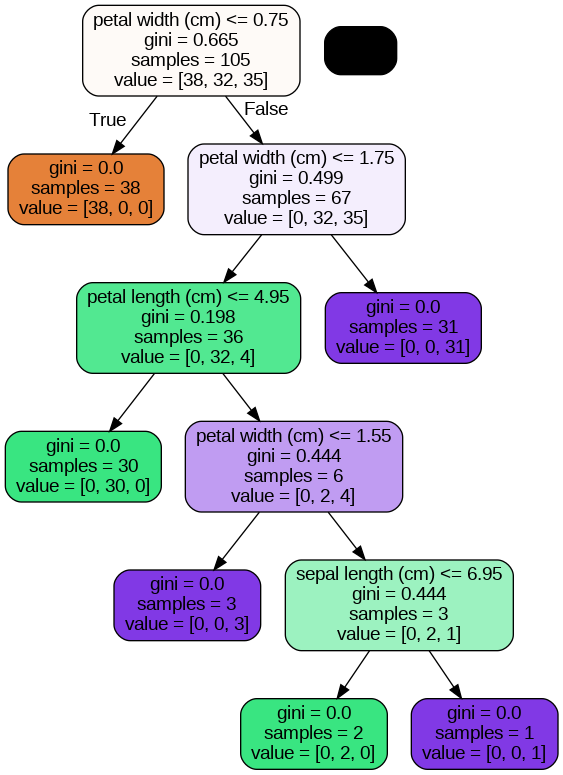

In [21]:
import pydotplus

features = list(x_train.columns)
dot_data = StringIO()
export_graphviz(dt_iris, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_pdf('iris_pdf') # file saved to currunt working directory
Image(graph.create_png())

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters.

First, let's understand the parameters in a decision tree. You can read this in the documentation using help(DecisionTreeClassifier).

**criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.

**splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.

**max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.

**max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.

**min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.

**max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.

**min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# Here, K-fold split randomly our dataset into 5 parts(or number of keys mentioned), 4 of which is used as training and 1 is used as testing,
# for that perticular pass of grid search cv of cross validation.


# parameter to built the model on
parameter = {'max_depth':range(1,10)}
# its a dictionary and it that we hae take a range of 1-10 for max_depth and run the decision tree modeling process for thi range of max_depth, in return
# it give us the best result


# instantiate to the model
dtree =  DecisionTreeClassifier(criterion='gini', random_state=100)


# fit tree on training data
tree = GridSearchCV(dtree, parameter, cv=n_folds, scoring='accuracy', return_train_score=True)
tree.fit(x_train, y_train)
# if we are running the Decision Tree model it will take less modeling time as it just run 1 time.
# now we are running GridSearchCV for range of 1 to 10, hence it take more modeling time, as it runs decisin mmodel for 10 times.
# GridSearchCV is also use for other ML algos.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [23]:
# scores of GridSearchCV

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003104,0.001694,0.001889,0.000357,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.002317,0.000116,0.001643,0.000137,2,{'max_depth': 2},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,7,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
2,0.002292,0.000175,0.001568,0.000058,3,{'max_depth': 3},0.952381,1.000000,0.809524,0.952381,...,0.942857,0.069985,7,0.964286,0.976190,0.988095,0.988095,0.976190,0.978571,0.008909
3,0.002311,0.000056,0.001591,0.000022,4,{'max_depth': 4},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,6,0.976190,0.988095,1.000000,0.988095,1.000000,0.990476,0.008909
4,0.002832,0.000627,0.002175,0.000505,5,{'max_depth': 5},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,0.988095,1.000000,1.000000,1.000000,1.000000,0.997619,0.004762


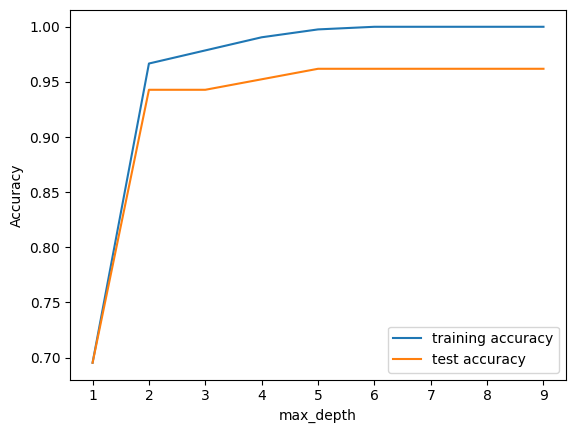

In [24]:
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label="training accuracy")
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label="test accuracy")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()